In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from unicodedata import decimal
import statistics as stat
%matplotlib inline

In [2]:
df = pd.read_json('eltoquedataECU1000.json')
df.head()

,_id,min,max,avg,count_values,median,first,last
0,2021-01-01,45.0,46.0,45.50,2,46.0,"{'value': 46, 'date': '2021-01-01 14:50:37'}","{'value': 45, 'date': '2021-01-01 17:14:55'}"
1,2021-01-02,43.0,46.5,45.25,4,46.5,"{'value': 46.5, 'date': '2021-01-02 16:12:31'}","{'value': 45, 'date': '2021-01-03 06:27:31'}"
2,2021-01-03,43.0,48.0,45.12,8,45.0,"{'value': 45, 'date': '2021-01-03 08:13:30'}","{'value': 45, 'date': '2021-01-04 03:23:35'}"
3,2021-01-04,43.0,48.0,45.00,8,44.0,"{'value': 44, 'date': '2021-01-04 08:41:53'}","{'value': 48, 'date': '2021-01-04 17:05:34'}"
4,2021-01-05,44.5,47.0,45.55,10,45.0,"{'value': 45, 'date': '2021-01-05 07:49:48'}","{'value': 45, 'date': '2021-01-06 06:10:53'}"


In [3]:
df2 = pd.json_normalize(df['last'])
df2.head()

,value,date
0,45.0,2021-01-01 17:14:55
1,45.0,2021-01-03 06:27:31
2,45.0,2021-01-04 03:23:35
3,48.0,2021-01-04 17:05:34
4,45.0,2021-01-06 06:10:53


In [6]:
data = df2[['date','value']]
log_value = np.log(1 + data["value"].pct_change())
data = data.assign(log_values = log_value)
log_data = data[['date','log_values']]
log_data.head()

,date,log_values
0,2021-01-01 17:14:55,NaN
1,2021-01-03 06:27:31,0.000000
2,2021-01-04 03:23:35,0.000000
3,2021-01-04 17:05:34,0.064539
4,2021-01-06 06:10:53,-0.064539


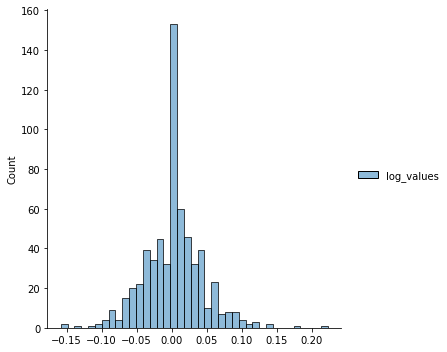

In [7]:
sns.displot(log_data.iloc[1:])

Text(0, 0.5, 'EUR VALUE')

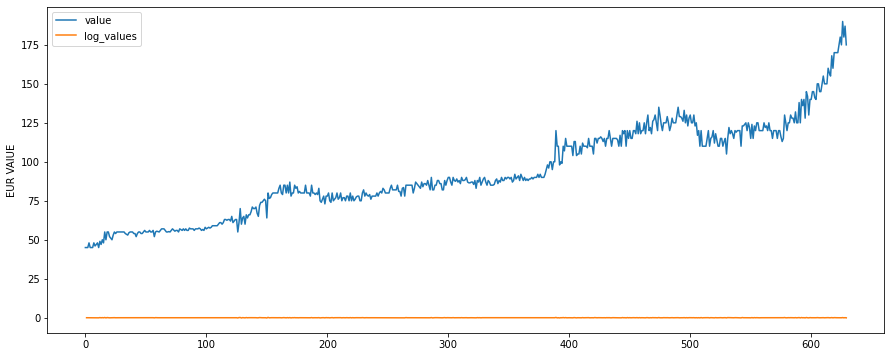

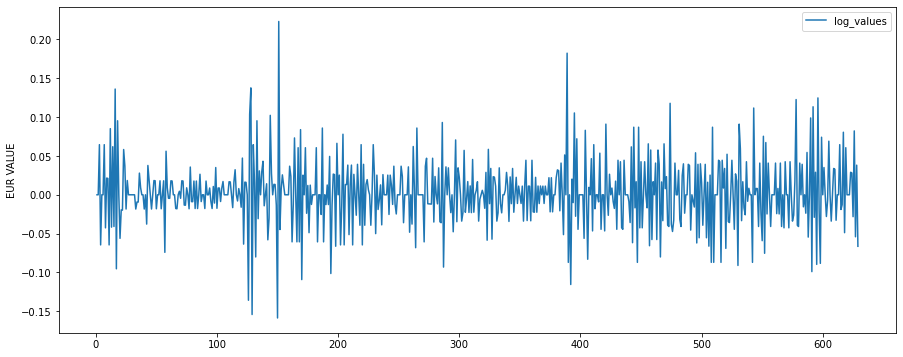

In [8]:
data.plot(figsize=(15,6))
plt.ylabel("EUR VAlUE")

log_data.plot(figsize=(15,6))
plt.ylabel("EUR VALUE")

In [9]:
u = log_data.mean()
var = log_data.var()
drift = u - (0.5*var)
drift

C:\Users\Chuchi\AppData\Local\Temp/ipykernel_12504/1574796414.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  u = log_data.mean()
C:\Users\Chuchi\AppData\Local\Temp/ipykernel_12504/1574796414.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var = log_data.var()


log_values    0.001259
dtype: float64

In [10]:
stddev = log_data.std()
x = np.random.rand(10,2)
norm.ppf(x)
Z = norm.ppf(np.random.rand(9,10000))
t_intervals = 1000
iterations = 10
daily_returns = np.exp(drift.values + stddev.values * norm.ppf(np.random.rand(9,1000)))
daily_returns

C:\Users\Chuchi\AppData\Local\Temp/ipykernel_12504/1422951533.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stddev = log_data.std()


array([[1.07926397, 1.02608515, 1.05141326, ..., 1.06568551, 1.04207473,
        1.00325335],
       [1.09483402, 0.95833713, 1.01259425, ..., 1.07573227, 0.94650615,
        0.97145621],
       [0.91909546, 1.05313132, 0.99376116, ..., 0.9578352 , 1.02304784,
        1.11121551],
       ...,
       [1.02668149, 1.01417802, 1.11460682, ..., 1.04278079, 0.96458621,
        0.99964013],
       [1.03422844, 1.01887241, 1.0171228 , ..., 1.02671654, 1.02872713,
        1.04017953],
       [1.00179474, 1.04709758, 1.08183374, ..., 0.99451616, 0.99782341,
        1.01410909]])

In [12]:
S0 = data.iloc[-1]["value"]
price_list = np.zeros_like(daily_returns)
price_list[0] = S0
for t in range(1,9):
    price_list[t] = price_list[t-1]*daily_returns[t]

            0           1           2           3           4           5  \
0  175.000000  175.000000  175.000000  175.000000  175.000000  175.000000   
1  191.595954  167.708998  177.203994  184.318565  169.874469  174.149633   
2  176.094971  176.619598  176.098447  179.209066  175.644428  186.491573   
3  172.320306  180.820642  162.472100  183.783698  162.708722  183.691666   
4  171.848246  178.715117  151.211491  182.765756  166.977117  186.190972   
5  177.287727  184.262748  152.953303  178.912608  170.654198  179.467543   
6  182.018028  186.875229  170.482796  171.662416  166.647859  185.043256   
7  188.248220  190.402015  173.401938  185.203778  177.763805  196.510438   
8  188.586076  199.369488  187.592067  186.932777  181.945550  191.788648   

            6           7           8           9  
0  175.000000  175.000000  175.000000  175.000000  
1  177.410716  172.441708  184.071743  192.070737  
2  181.086125  169.785208  200.546323  192.164763  
3  170.515659  163.92

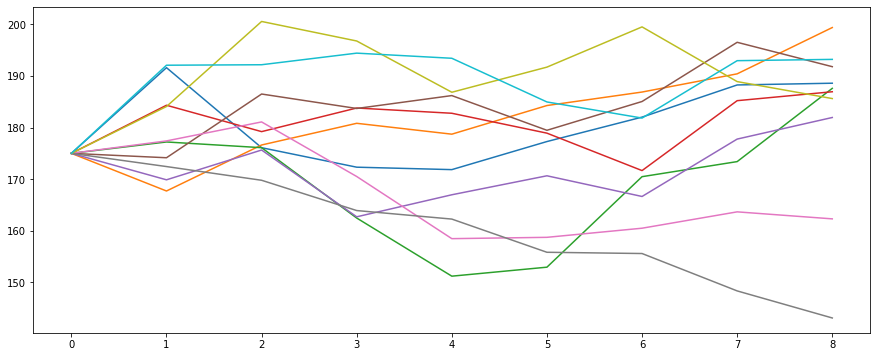

In [13]:

plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(price_list).iloc[:,0:10])
print(pd.DataFrame(price_list).iloc[:,0:10])


          0           1           2           3           4           5    \
0  175.000000  175.000000  175.000000  175.000000  175.000000  175.000000   
1  191.595954  167.708998  177.203994  184.318565  169.874469  174.149633   
2  176.094971  176.619598  176.098447  179.209066  175.644428  186.491573   
3  172.320306  180.820642  162.472100  183.783698  162.708722  183.691666   
4  171.848246  178.715117  151.211491  182.765756  166.977117  186.190972   
5  177.287727  184.262748  152.953303  178.912608  170.654198  179.467543   
6  182.018028  186.875229  170.482796  171.662416  166.647859  185.043256   
7  188.248220  190.402015  173.401938  185.203778  177.763805  196.510438   
8  188.586076  199.369488  187.592067  186.932777  181.945550  191.788648   

          6           7           8           9    ...         990  \
0  175.000000  175.000000  175.000000  175.000000  ...  175.000000   
1  177.410716  172.441708  184.071743  192.070737  ...  193.715806   
2  181.086125  169.

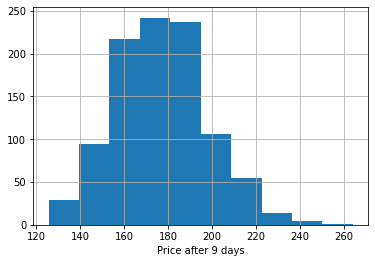

In [14]:
print(pd.DataFrame(price_list))
plt.grid(True)
plt.xlabel("Price after 9 days")

plt.hist(pd.DataFrame(price_list).iloc[-1])
plt.show()